In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

points_n = 200
clusters_n = 3
iteration_n = 100
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)


In [2]:
points = np.random.uniform(0, 10, (points_n, 2))
centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])

print(centroids)

tf.Tensor(
[[5.65642001 0.84904163]
 [7.1946897  4.2310646 ]
 [5.13128154 6.6662455 ]], shape=(3, 2), dtype=float64)


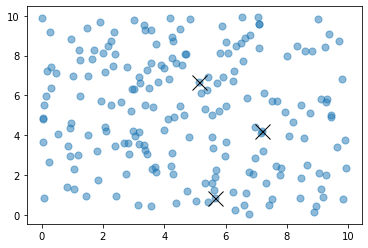

In [3]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [4]:
def closest_centroids(points, centroids):
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2)
    assignments = tf.argmin(distances, 0)
    return assignments


In [5]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


In [6]:
for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)

In [7]:
print("centroids", centroids)

centroids [[2.3805468  3.4855907 ]
 [7.52317326 2.97237534]
 [4.38131768 8.07214821]]


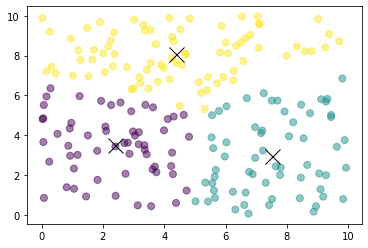

In [8]:
plt.scatter(points[:, 0], points[:, 1], c=closest, s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()